In [105]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Buisness Questions:** <br>
1) Which Countries have the most number of players (top 5)? <br>
2) Which Countries have the least and highest Age average (top 5)?  <br>
3) Which Clubs have the least and highest Age average (top 5)?  <br>
4) Top 10 Age groups for fifa 19 list of players? <br>
5) Among the players, who has the higest value and wage (top 5)? <br>
6) Which featuers corrolate most as an effect for Value and Wage? <br>

Reading the data and initial investigations:

In [106]:
df1 = pd.read_csv('C:/Users/LENOVO/Desktop/fifa19/data.csv') #reading the data and assign it to df1

In [107]:
df1.head() #print few rows

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [108]:
df1.shape #check the number of rows & columns 

(18207, 89)

In [109]:
df1.columns[df1.isnull().sum() == 0] #which columns has no nulls

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club Logo', 'Value', 'Wage', 'Special'],
      dtype='object')

In [110]:
# check number of nulls for the columns
dict_ = {}
for column in df1.columns:
    nan_values = df1[column].isna().sum()
    dict_[column] = nan_values
print(dict_)

{'Unnamed: 0': 0, 'ID': 0, 'Name': 0, 'Age': 0, 'Photo': 0, 'Nationality': 0, 'Flag': 0, 'Overall': 0, 'Potential': 0, 'Club': 241, 'Club Logo': 0, 'Value': 0, 'Wage': 0, 'Special': 0, 'Preferred Foot': 48, 'International Reputation': 48, 'Weak Foot': 48, 'Skill Moves': 48, 'Work Rate': 48, 'Body Type': 48, 'Real Face': 48, 'Position': 60, 'Jersey Number': 60, 'Joined': 1553, 'Loaned From': 16943, 'Contract Valid Until': 289, 'Height': 48, 'Weight': 48, 'LS': 2085, 'ST': 2085, 'RS': 2085, 'LW': 2085, 'LF': 2085, 'CF': 2085, 'RF': 2085, 'RW': 2085, 'LAM': 2085, 'CAM': 2085, 'RAM': 2085, 'LM': 2085, 'LCM': 2085, 'CM': 2085, 'RCM': 2085, 'RM': 2085, 'LWB': 2085, 'LDM': 2085, 'CDM': 2085, 'RDM': 2085, 'RWB': 2085, 'LB': 2085, 'LCB': 2085, 'CB': 2085, 'RCB': 2085, 'RB': 2085, 'Crossing': 48, 'Finishing': 48, 'HeadingAccuracy': 48, 'ShortPassing': 48, 'Volleys': 48, 'Dribbling': 48, 'Curve': 48, 'FKAccuracy': 48, 'LongPassing': 48, 'BallControl': 48, 'Acceleration': 48, 'SprintSpeed': 48, 'A

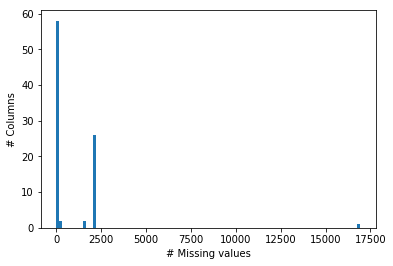

In [111]:
#plotting the nulls 
plt.hist(dict_.values(), bins=100)
plt.ylabel('# Columns')
plt.xlabel('# Missing values')
plt.show()

In [112]:
#checking data types
df1.dtypes

Unnamed: 0                    int64
ID                            int64
Name                         object
Age                           int64
Photo                        object
Nationality                  object
Flag                         object
Overall                       int64
Potential                     int64
Club                         object
Club Logo                    object
Value                        object
Wage                         object
Special                       int64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Real Face                    object
Position                     object
Jersey Number               float64
Joined                       object
Loaned From                  object
Contract Valid Until         object
Height                       object
Weight                      

After checking the data and based on the business questions, some of the columns will no longer be needed.

In [113]:
df1.drop(['Unnamed: 0'], axis=1, inplace=True)
df1.drop(['ID'], axis=1, inplace=True)
df1.drop(['Photo'], axis=1, inplace=True)
df1.drop(['Flag'], axis=1, inplace=True)
df1.drop(['Club Logo'], axis=1, inplace=True)

In [114]:
df1.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


#preparing the data <br>
* remove the euro sign from Value and Wage
* process the amounts in value and wage
* change data type of value and wage

In [115]:
for i in range(0, len(df1)):
    df1['Value'][i] = df1['Value'][i].strip('€')
    df1['Wage'][i] = df1['Wage'][i].strip('€')

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [116]:
d = {'M':6, 'K':3}
def text_to_num(text):
        if text[-1] in d:
            num, magnitude = text[:-1], text[-1]
            return float(num) * 10 ** d[magnitude]
        else:
            return float(text)

In [117]:
for i in range(0, len(df1)):
    df1['Value'][i] = text_to_num(df1['Value'][i])
    df1['Wage'][i] = text_to_num(df1['Wage'][i])

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [118]:
df1.Value = df1.Value.astype(int)
df1.Wage = df1.Wage.astype(int)

1) Which Countries have the most number of players (top 5)? 

In [119]:
df1['Nationality'].value_counts()

England                 1662
Germany                 1198
Spain                   1072
Argentina                937
France                   914
Brazil                   827
Italy                    702
Colombia                 618
Japan                    478
Netherlands              453
Sweden                   397
China PR                 392
Chile                    391
Republic of Ireland      368
Mexico                   366
United States            353
Poland                   350
Norway                   341
Saudi Arabia             340
Denmark                  336
Korea Republic           335
Portugal                 322
Turkey                   303
Austria                  298
Scotland                 286
Belgium                  260
Australia                236
Switzerland              220
Uruguay                  149
Senegal                  130
                        ... 
Chad                       2
Philippines                2
Bermuda                    2
Nicaragua     

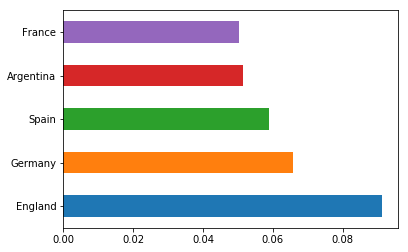

In [120]:
(df1.Nationality.value_counts()[:5]/df1.shape[0]).plot(kind='barh');

We can see from the visualization the top 5 countries with players, where England as the top country indicating why England is considered as the most powerful and has the largest number of supporters in the world.

2) Which Countries have the least and highest Age average (top 5)?

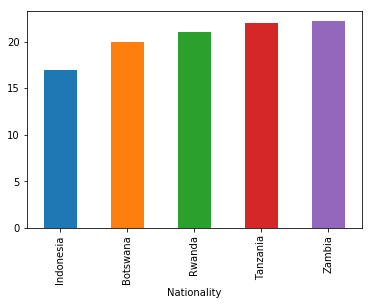

In [121]:
df1.groupby("Nationality")["Age"].mean().sort_values().head().plot(kind="bar");

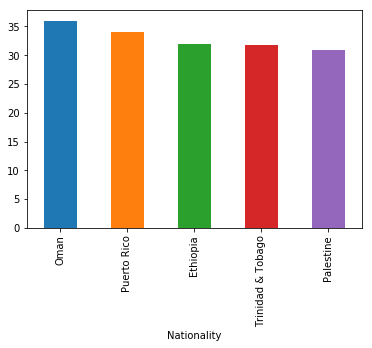

In [122]:
df1.groupby("Nationality")["Age"].mean().sort_values(ascending=False).head().plot(kind="bar");

We can see from the above visualization the Age average in both highest and lowest indicating the vision of the countries to establish youth soccer institutes or focusing on experianced players.

3) Which Clubs have the least and highest Age average (top 5)? 

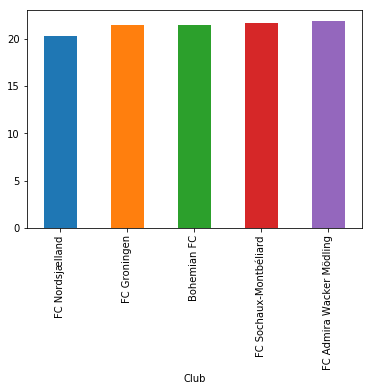

In [123]:
df1.groupby("Club")["Age"].mean().sort_values().head().plot(kind="bar");

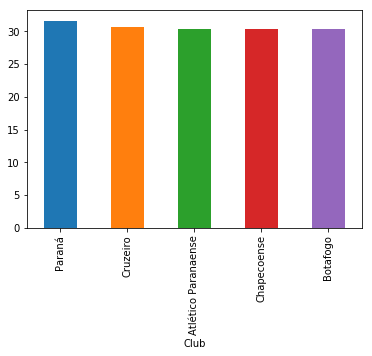

In [124]:
df1.groupby("Club")["Age"].mean().sort_values(ascending=False).head().plot(kind="bar");

Also, we can see here the Club strategies with regards to Experience level for the players.

4) Top 10 Age groups for fifa 19 list of players? 

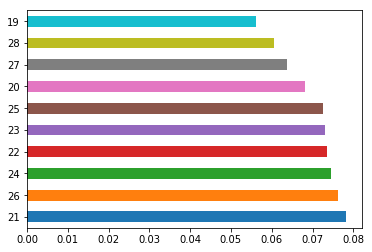

In [125]:
(df1.Age.value_counts()[:10]/df1.shape[0]).plot(kind='barh');

Above the Age distributions for the players. 

5) Among the players, who has the higest value and wage (top 5)? 

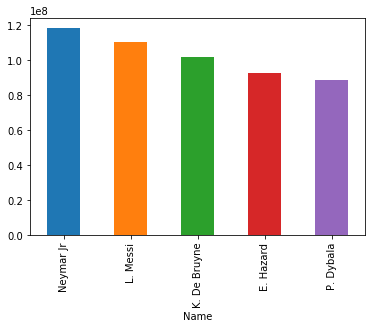

In [126]:
df1.groupby("Name")["Value"].mean().sort_values(ascending=False).head().plot(kind="bar");

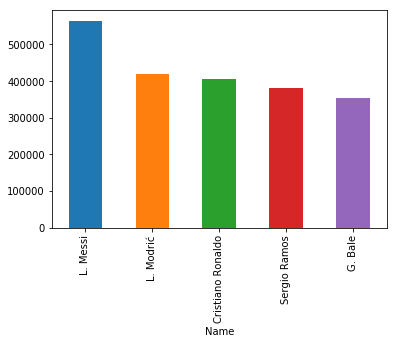

In [127]:
df1.groupby("Name")["Wage"].mean().sort_values(ascending=False).head().plot(kind="bar");

6) Which featuers corrolate most as an effect for Value and Wage? 

In [128]:
#picking featuers that are common for all the players
corr_ = df1[['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special', 'International Reputation', 
            'Weak Foot', 'Skill Moves', 'Crossing', 'Finishing', 'BallControl','Acceleration',
             'SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength',]]

In [129]:
corr_.corr()

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Crossing,...,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength
Age,1.000000,0.452350,-0.253312,0.075022,0.141145,0.236695,0.253765,0.059867,0.027649,0.130545,...,0.084969,-0.158667,-0.151682,-0.019395,0.453124,-0.089877,0.156947,0.177167,0.097793,0.332798
Overall,0.452350,1.000000,0.660939,0.627085,0.571926,0.606960,0.499491,0.212015,0.414463,0.394972,...,0.460197,0.196869,0.210647,0.264952,0.850045,0.103160,0.441118,0.264435,0.365656,0.349326
Potential,-0.253312,0.660939,1.000000,0.576218,0.486413,0.383727,0.372993,0.162346,0.354290,0.246319,...,0.354396,0.234608,0.236771,0.222310,0.513425,0.138025,0.288318,0.109151,0.202563,0.075769
Value,0.075022,0.627085,0.576218,1.000000,0.858442,0.377738,0.653176,0.165221,0.315651,0.249785,...,0.308818,0.170603,0.172677,0.194259,0.540552,0.113726,0.281360,0.124515,0.210721,0.128924
Wage,0.141145,0.571926,0.486413,0.858442,1.000000,0.347835,0.668635,0.140849,0.263205,0.232834,...,0.277615,0.124985,0.130315,0.156287,0.495560,0.088873,0.258351,0.129691,0.177562,0.139360
Special,0.236695,0.606960,0.383727,0.377738,0.347835,1.000000,0.292208,0.341855,0.763412,0.866417,...,0.912107,0.654337,0.645963,0.699673,0.597169,0.586788,0.835277,0.321846,0.792762,0.192990
International Reputation,0.253765,0.499491,0.372993,0.653176,0.668635,0.292208,1.000000,0.128317,0.208153,0.191770,...,0.217946,0.044319,0.044070,0.100869,0.445614,0.050076,0.227772,0.120931,0.094780,0.131280
Weak Foot,0.059867,0.212015,0.162346,0.165221,0.140849,0.341855,0.128317,1.000000,0.340721,0.307925,...,0.356383,0.261435,0.248822,0.302062,0.201341,0.254022,0.332855,0.069752,0.232094,-0.008470
Skill Moves,0.027649,0.414463,0.354290,0.315651,0.263205,0.763412,0.208153,0.340721,1.000000,0.741035,...,0.818051,0.652356,0.624098,0.681765,0.377044,0.578459,0.718237,0.107553,0.570226,-0.041475
Crossing,0.130545,0.394972,0.246319,0.249785,0.232834,0.866417,0.191770,0.307925,0.741035,1.000000,...,0.840916,0.668365,0.645578,0.698320,0.389574,0.618280,0.705503,0.135486,0.672633,-0.029403


As we can see, Overall, Potential and International Reputation corrolate mostly with player's Value. Where Overall and International Reputation corrolate to Player's Wage. And abviously, Value and Wage are higlhy assosiated with each other.